In [84]:
import numpy as np
import pandas as pd

# Task #1: Reading Customer Information 

### a) Import the data from ‘Accounts Ledger.xlsx’ into a data structure of your program, referred to as the Accounts table hereafter.

In [85]:
account_df = pd.read_excel("Account Ledger.xlsx")

In [86]:
account_df.head()

,Accounts,Billing Addresses,Product Related?
0,Packaging Corporation of America,"Lake Forest, Illinois",0
1,American Electric Power,"Columbus, Ohio",1
2,Citizens Financial Group,"Providence, Rhode Island",1
3,Dover Corporation,NaN,1
4,Cincinnati Financial,"Fairfield, Ohio",1


### b) Validate the accuracy of the data read using Python functions.

In [87]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accounts           182 non-null    object
 1   Billing Addresses  160 non-null    object
 2   Product Related?   182 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


In [88]:
#Checking the values which are null and count of them
nullvalues = account_df.isnull().sum()
print(nullvalues)

Accounts              0
Billing Addresses    22
Product Related?      0
dtype: int64


In [89]:
account_df.describe()

,Product Related?
count,182.000000
mean,0.681319
std,0.467251
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [90]:
#Checking the unique values in the Accounts column

diff_values = account_df['Accounts'].unique() 
print(len(diff_values))


182


### c) Add or revise column labels as needed.

In [91]:
#Changing the column name of Accounts to Account Name
account_df.rename(columns={'Accounts':'Account Name'}, inplace=True)
account_df.rename(columns={'Billing Addresses':'Billing Address'}, inplace=True)

print(account_df.head())

                       Account Name           Billing Address  \
0  Packaging Corporation of America     Lake Forest, Illinois   
1           American Electric Power            Columbus, Ohio   
2          Citizens Financial Group  Providence, Rhode Island   
3                 Dover Corporation                       NaN   
4              Cincinnati Financial           Fairfield, Ohio   

   Product Related?  
0                 0  
1                 1  
2                 1  
3                 1  
4                 1  


### d) During the preliminary data review, the project team found that “Product Related?” is not needed for this project. Remove the “Product Related?” column from the data structure.

In [92]:
account_df_copy = account_df.copy()

In [93]:
account_df_copy.drop('Product Related?', inplace=True, axis=1)

print(account_df_copy.head())

                       Account Name           Billing Address
0  Packaging Corporation of America     Lake Forest, Illinois
1           American Electric Power            Columbus, Ohio
2          Citizens Financial Group  Providence, Rhode Island
3                 Dover Corporation                       NaN
4              Cincinnati Financial           Fairfield, Ohio


### e) Identify and calculate missing values in the dataset. For example, calculate the number of entries containing missing data. Based on the number of missing data, decide how to handle missing data.

In [94]:
print("Account Ledger Data info:")
print(account_df_copy.info())


nullvalues_account = account_df_copy.isnull().sum()

print("Null values in each column of Account Ledger table:")
print(nullvalues_account)

Account Ledger Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     182 non-null    object
 1   Billing Address  160 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB
None
Null values in each column of Account Ledger table:
Account Name        0
Billing Address    22
dtype: int64


### f) The project team found several customers’ addresses are missing in ‘Accounts Ledger.xlsx’ and requested the missing information. M&F Company provided the missing data, which is listed in the table below. Properly update the information in the Accounts table. 

In [95]:
updated_miss_values = {
"Dover Corporation":"Downers Grove, Illinois",
"Vici Properties":"New York City, New York",
"Corteva":"Indianapolis, Indiana",
"Microsoft":"Redmond, Washington",
"Teleflex":"Wayne, Pennsylvania",
"DTE Energy":"Detroit, Michigan",
"Cardinal Health":"Dublin, Ohio",
"Citigroup":"New York City, New York",
"Simon Property Group":"Indianapolis, Indiana",
"LyondellBasell":"Rotterdam, Netherlands",
"Monolithic Power Systems":"Kirkland, Washington",
"Johnson Controls":"Cork, Ireland",
"SBA Communications":"Boca Raton, Florida",
"Evergy":"Kansas City, Missouri",
"Brown & Forman":"Louisville, Kentucky",
"Mastercard":"Harrison, New York",
"Tyler Technologies":"Plano, Texas",
"Broadcom Inc.":"Palo Alto, California",
"Yum! Brands":"Louisville, Kentucky",
"CH Robinson":"Eden Prairie, Minnesota",
"WestRock":"Atlanta, Georgia",
"American Tower":"Fort Worth, Texas"
}


for acctName, billaddr in updated_miss_values.items():
    account_df_copy.loc[account_df_copy['Account Name']==acctName, 'Billing Address']=billaddr

print(account_df_copy)

                         Account Name           Billing Address
0    Packaging Corporation of America     Lake Forest, Illinois
1             American Electric Power            Columbus, Ohio
2            Citizens Financial Group  Providence, Rhode Island
3                   Dover Corporation   Downers Grove, Illinois
4                Cincinnati Financial           Fairfield, Ohio
..                                ...                       ...
177                          WestRock          Atlanta, Georgia
178                     Zimmer Biomet           Warsaw, Indiana
179                    Steel Dynamics       Fort Wayne, Indiana
180                    American Tower         Fort Worth, Texas
181                           Pentair   Worsley, United Kingdom

[182 rows x 2 columns]


### g) Calculate missing values in the Accounts table. After the above operation, there will not be missing data in the table. 

In [96]:
#Checking the null values after updating the columns

print("Account Ledger Data info after updaing the values:")
print(account_df_copy.info())


nullvalues_check = account_df_copy.isnull().sum()

print("Checking for Null values in each column of Account Ledger table after update:")
print(nullvalues_check)

Account Ledger Data info after updaing the values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     182 non-null    object
 1   Billing Address  182 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB
None
Checking for Null values in each column of Account Ledger table after update:
Account Name       0
Billing Address    0
dtype: int64


In [97]:
#Saving the Account Ledger Table after Updates
account_df_copy.to_csv("Account_Ledger_Updated.csv", index=False)

# Task #2: Reading Invoice Data

### a) Import the data from 'Invoice Ledger.xlsx' into a data structure of your program, referred to as the Invoice table hereafter. 

In [98]:
invoice_df = pd.read_excel("Invoice Ledger.xlsx")

In [99]:
print(invoice_df.head())
print(invoice_df.describe())

  Invoice date  Amount line Product ID       Account Name
0   01/03/2017        56.75         --   Johnson Controls
1   01/03/2017        56.75       0102   Johnson Controls
2   01/03/2017        38.04         --  Boston Scientific
3   01/03/2017        38.04       0102  Boston Scientific
4   01/03/2017        74.90         --  Boston Scientific
        Amount line
count  85333.000000
mean     195.235586
std      498.959114
min    -2160.000000
25%       12.800000
50%       45.000000
75%      161.000000
max    17820.000000


### b) Validate the accuracy of the data read using Python functions.

In [100]:
#Checking the information related to invoice table
print("Invoice Ledger Table Data information:")
print(invoice_df.info())

#Checking the null values in invoice table
nullvalue_invoce = invoice_df.isnull().sum()
print("Checking for the Null values in each column of the Invoice Ledger Table:")
print(nullvalue_invoce)

Invoice Ledger Table Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85333 entries, 0 to 85332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice date  85333 non-null  object 
 1   Amount line   85333 non-null  float64
 2   Product ID    85333 non-null  object 
 3   Account Name  85333 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.6+ MB
None
Checking for the Null values in each column of the Invoice Ledger Table:
Invoice date    0
Amount line     0
Product ID      0
Account Name    0
dtype: int64


In [101]:
#Checking the Count of product id column where values are "--"

productid_diff = invoice_df[invoice_df['Product ID'] == '--']

print(productid_diff)

      Invoice date  Amount line Product ID          Account Name
0       01/03/2017        56.75         --      Johnson Controls
2       01/03/2017        38.04         --     Boston Scientific
4       01/03/2017        74.90         --     Boston Scientific
6       01/03/2017        76.84         --     Boston Scientific
8       01/03/2017         5.97         --             Linde plc
...            ...          ...        ...                   ...
85326   09/29/2023         0.00         --  Willis Towers Watson
85327   09/29/2023       418.90         --  Willis Towers Watson
85329   09/29/2023         0.00         --  Willis Towers Watson
85330   09/29/2023       320.00         --      Jacobs Solutions
85332   09/29/2023         0.00         --      Jacobs Solutions

[23902 rows x 4 columns]


### c) Add or revise column labels as needed. Make column labels in Accounts and Invoice tables match if they are for the same data.

In [102]:
invoice_df_copy = invoice_df.copy()
invoice_df_copy.rename(columns={'Amount line':'Amount'}, inplace=True)

In [103]:
invoice_df_copy.head()

,Invoice date,Amount,Product ID,Account Name
0,01/03/2017,56.75,--,Johnson Controls
1,01/03/2017,56.75,0102,Johnson Controls
2,01/03/2017,38.04,--,Boston Scientific
3,01/03/2017,38.04,0102,Boston Scientific
4,01/03/2017,74.90,--,Boston Scientific


In [104]:
invoice_df_copy.rename(columns={'Invoice date':'Invoice Date'}, inplace=True)
invoice_df_copy.head()

,Invoice Date,Amount,Product ID,Account Name
0,01/03/2017,56.75,--,Johnson Controls
1,01/03/2017,56.75,0102,Johnson Controls
2,01/03/2017,38.04,--,Boston Scientific
3,01/03/2017,38.04,0102,Boston Scientific
4,01/03/2017,74.90,--,Boston Scientific


# Task #3: Data Pre-processing

### a) Ensure that the customer names listed in the 'Accounts' column of the Accounts table match those in the 'Account Name' column of the Invoice table.

In [105]:
#Here the Accounts table modified column is being matched with the column name of the Account Name in invoice Table
matching_customers = set(account_df_copy['Account Name']).intersection(set(invoice_df_copy['Account Name']))
print(matching_customers)
print(len(matching_customers))

{'Constellation Brands', 'Cardinal Health', 'LKQ Corporation', 'Evergy', 'Expedia Group', 'Genuine Parts Company', 'Royal Caribbean Group', 'Seagate Technology', 'Tapestry, Inc.', 'Henry Schein', 'Dow Inc.', 'Linde plc', 'Medtronic', 'Caesars Entertainment', 'Equinix', 'Philip Morris International', 'IQVIA', 'Vici Properties', 'Darden Restaurants', 'Paychex', 'Tesla, Inc.', 'Public Storage', 'CBRE Group', 'Nasdaq, Inc.', 'Schlumberger', 'Apple Inc.', 'Kinder Morgan', 'American Water Works', 'Masco', 'Airbnb', 'Biogen', 'AES Corporation', 'Kroger', 'American Tower', '3M', 'Illumina', 'Gartner', 'Tractor Supply', 'Abbott', 'Ventas', 'Verizon', 'Aon', 'Steris', 'Host Hotels & Resorts', 'U.S. Bank', 'Federal Realty', 'Broadcom Inc.', 'Howmet Aerospace', 'Kimco Realty', 'Mondelez International', 'Fidelity National Information Services', 'International Paper', 'Marsh McLennan', 'LyondellBasell', 'Pfizer', 'Tyler Technologies', 'American Electric Power', 'American Airlines Group', 'Nucor', 'Q

### b) The project team found discrepancies where some customer names on the Invoice table don’t exist in the Accounts table. M&F Company provided supplementary information to resolve the mismatch in the datasets, which is summarized in the table below. Add the information to the Accounts table.

In [106]:
added_supplementary_info = {
    'Account Name': ['Blackstone', 'IBM', 'Booking Holdings', 'Arch Capital Group', 'NVR, Inc.', 
                     'BlackRock', 'Iron Mountain', 'Eli Lilly and Company', 'Coca-Cola Company (The)', 
                     'Progressive Corporation', 'Everest Re', 'Kellanova', 'Alphabet Inc. (Class A)', 
                     'News Corp (Class A)'],
    'Billing Address': ['New York City, New York', 'Armonk, New York', 'Norwalk, Connecticut', 
                        'Hamilton, Bermuda', 'Reston, Virginia', 'New York City, New York', 
                        'Boston, Massachusetts', 'Indianapolis, Indiana', 'Atlanta, Georgia', 
                        'Mayfield Village, Ohio', 'Hamilton, Bermuda', 'Chicago, Illinois', 
                        'Mountain View, California', 'New York City, New York']
}

account_df_2 = pd.DataFrame(added_supplementary_info)

account_df_copy = pd.concat([account_df_copy, account_df_2], ignore_index=True)

### c) Ensure that all customer names listed on the Invoice table are available in the Accounts table.

In [110]:
print("After all the customer names of Invoice table are added to account table:")
print(account_df_copy.info())
print("Description Related to Account Table: ")
print(account_df_copy.describe())

After all the customer names of Invoice table are added to account table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     196 non-null    object
 1   Billing Address  196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
None
Description Related to Account Table: 
                            Account Name          Billing Address
count                                196                      196
unique                               196                      125
top     Packaging Corporation of America  New York City, New York
freq                                   1                       15


In [111]:
account_df_copy.head()

,Account Name,Billing Address
0,Packaging Corporation of America,"Lake Forest, Illinois"
1,American Electric Power,"Columbus, Ohio"
2,Citizens Financial Group,"Providence, Rhode Island"
3,Dover Corporation,"Downers Grove, Illinois"
4,Cincinnati Financial,"Fairfield, Ohio"


### d) The project team also found different customer names in two data tables but could be the same customers. M&F Company indicated that the customers listed below are the same and should be treated together. Properly update the data table(s).

In [120]:
updated_customer_names = {
    "FedEx":"Federal Express",
    "ConocoPhillips":"Conoco Phillips",
    "Builders FirstSource":"Builder's First Source",
    "T-Mobile US":"T-Mobile",
    "Home Depot (The)":"Home Depot",
    "Brown–Forman":"Brown & Forman",
    "Xylem Inc.":"Xylem"
}

invoice_df_copy['Account Name'] = invoice_df_copy['Account Name'].replace(updated_customer_names)

In [121]:
invoice_df_copy.to_csv('Invoice_Ledger_Updated.csv', index=False)

### e) Check any duplicated account names that exist in the Accounts table. There should be no duplicate customer names on the Accounts table.

In [122]:
print(account_df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     196 non-null    object
 1   Billing Address  196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
None


In [123]:
account_df_copy = account_df_copy.drop_duplicates(['Account Name'])

print(account_df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     196 non-null    object
 1   Billing Address  196 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB
None


#### Note: From the above we can see no rows has been droped and we can say that there are no duplicate values

### f) The project team found potential duplicate values in the Invoice table specifically where the Product ID is marked as "--". M&F Company clarified those entries with "--" as the Product ID represent subtotal values, followed by the total invoice amount. M&F Company instructed to remove all rows containing "--" as the Product ID from the Invoice table.

In [126]:
print(invoice_df_copy.info())

print("Number of Rows that contain the '--' value in the Invoice Table:")
print(invoice_df_copy[invoice_df_copy['Product ID']=='--'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85333 entries, 0 to 85332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice Date  85333 non-null  object 
 1   Amount        85333 non-null  float64
 2   Product ID    85333 non-null  object 
 3   Account Name  85333 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.6+ MB
None
Number of Rows that contain the '--' value in the Invoice Table:
      Invoice Date  Amount Product ID          Account Name
0       01/03/2017   56.75         --      Johnson Controls
2       01/03/2017   38.04         --     Boston Scientific
4       01/03/2017   74.90         --     Boston Scientific
6       01/03/2017   76.84         --     Boston Scientific
8       01/03/2017    5.97         --             Linde plc
...            ...     ...        ...                   ...
85326   09/29/2023    0.00         --  Willis Towers Watson
85327   09/29/2023  418.90      

In [129]:
#Deleting the rows with '--' product value
invoice_df_copy = invoice_df_copy.drop(invoice_df_copy[invoice_df_copy['Product ID']=='--'].index)

In [132]:
invoice_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61431 entries, 1 to 85331
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice Date  61431 non-null  object 
 1   Amount        61431 non-null  float64
 2   Product ID    61431 non-null  object 
 3   Account Name  61431 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.3+ MB


### g) Examine the data type of columns in both tables. Properly change the data type of columns if needed. For example, numeric types for number columns. Python provides datetime object, which contains date and time information along with various supporting functions. 

In [134]:
print("Data Types in the Account Ledger Table:")
print(account_df_copy.dtypes)

print("Data Types in the Invoice Ledger Table:")
print(invoice_df_copy.dtypes)

Data Types in the Account Ledger Table:
Account Name       object
Billing Address    object
dtype: object
Data Types in the Invoice Ledger Table:
Invoice Date     object
Amount          float64
Product ID       object
Account Name     object
dtype: object


In [135]:
#The Data type of the Invoice Date to be changed from object to DateTime Datatype
invoice_df_copy['Invoice Date'] = pd.to_datetime(invoice_df_copy['Invoice Date'])

print("Invoice Table Datatypes After changing the Datatypes:")
print(invoice_df_copy.dtypes)

Invoice Table Datatypes After changing the Datatypes:
Invoice Date    datetime64[ns]
Amount                 float64
Product ID              object
Account Name            object
dtype: object


### h) Identify any missing and invalid values in the ‘Amount line’ column. M&F Company specified that the ‘Amount line’ values should be positive numbers. Calculate the number of entries containing missing or invalid values. If the total missing or invalid values in the ‘Amount line’ column are less than 2%, M&F Company instructed us to process the data after removing those entries. Otherwise, fill the missing or invalid values with proper imputation values. After this step, no missing or invalid values should be in the Invoice table

In [138]:
invalid_val = invoice_df_copy[(invoice_df_copy['Amount'].isnull()) | (invoice_df_copy['Amount'] <= 0)]
print("Invalid Values or Null Values in Amount Line Column:")
print(invalid_val)

#Percentage of Invalid Values
percent_invalid_val = (len(invalid_val) / len(invoice_df_copy))*100
print("Percentage of Missing Values or Invalid Values:")
print(percent_invalid_val)

Invalid Values or Null Values in Amount Line Column:
      Invoice Date  Amount Product ID          Account Name
651     2017-01-30     0.0       0012         Broadcom Inc.
813     2017-02-06     0.0       0203  Willis Towers Watson
860     2017-02-07     0.0       0012            CBRE Group
1157    2017-02-17     0.0       0012                Evergy
1564    2017-03-06     0.0       0012         Expedia Group
...            ...     ...        ...                   ...
82561   2023-06-28     0.0       0206  Willis Towers Watson
82562   2023-06-28     0.0       0012  Willis Towers Watson
82563   2023-06-28     0.0       0203  Willis Towers Watson
82564   2023-06-28     0.0       0012  Willis Towers Watson
82565   2023-06-28     0.0       0203  Willis Towers Watson

[670 rows x 4 columns]
Percentage of Missing Values or Invalid Values:
1.0906545555175724


In [139]:
invoice_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61431 entries, 1 to 85331
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice Date  61431 non-null  datetime64[ns]
 1   Amount        61431 non-null  float64       
 2   Product ID    61431 non-null  object        
 3   Account Name  61431 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.3+ MB


In [141]:
#From the above we can see that Percentage is less than 2 so I am deleting those rows with invalid values
invoice_df_copy = invoice_df_copy.dropna(subset=['Amount'])
invoice_df_copy = invoice_df_copy[invoice_df_copy['Amount']> 0]

In [142]:
invoice_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60761 entries, 1 to 85331
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice Date  60761 non-null  datetime64[ns]
 1   Amount        60761 non-null  float64       
 2   Product ID    60761 non-null  object        
 3   Account Name  60761 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.3+ MB


In [143]:
account_df_copy.to_csv('Account_Ledger_Final.csv', index=False)
invoice_df_copy.to_csv('Invoice_Ledger_Final.csv', index=False)

In [144]:
account_df_final = account_df_copy.copy()
invoice_df_final = invoice_df_copy.copy()

# Task #4: Data Integration

### a) Merge the Accounts and Invoice tables using the ‘Account Name’ key. Hereafter, the merged file is referred to as the Master table.

In [146]:
master_table = pd.merge(account_df_final, invoice_df_final, how="inner", on="Account Name")

print("The Master Table after Merging the two tables is:")
print(master_table)

The Master Table after Merging the two tables is:
                           Account Name          Billing Address Invoice Date  \
0      Packaging Corporation of America    Lake Forest, Illinois   2023-07-21   
1      Packaging Corporation of America    Lake Forest, Illinois   2023-07-21   
2      Packaging Corporation of America    Lake Forest, Illinois   2023-08-29   
3               American Electric Power           Columbus, Ohio   2022-05-12   
4               American Electric Power           Columbus, Ohio   2022-05-12   
...                                 ...                      ...          ...   
60756               News Corp (Class A)  New York City, New York   2019-07-11   
60757               News Corp (Class A)  New York City, New York   2019-07-11   
60758               News Corp (Class A)  New York City, New York   2019-07-11   
60759               News Corp (Class A)  New York City, New York   2019-07-11   
60760               News Corp (Class A)  New York City, New

### b) After merging two tables, check for any merge conflicts (no match). Properly handle merge conflicts if there are. 

In [147]:
conflicts = master_table[master_table['Account Name'].isnull()]
print("Below are the Merge conflicts")
print(conflicts)

Below are the Merge conflicts
Empty DataFrame
Columns: [Account Name, Billing Address, Invoice Date, Amount, Product ID]
Index: []


#### Note: From the above we can say that there are no merge conflicts in the master table after merging

# Task #5: Assigning Product Categories to the Products

### M&F Company wanted to analyze sales revenue pertaining to two major product categories.For the category-based data analysis, assign an appropriate category to each product in the Master table 


### a) Using “Table 1. Mapping Table for Product ID vs. Category,” add a column named ‘Category’ to the Master table that specifies the category of each product.

In [148]:
map_product_category = {
    'Product ID': ['0011', '0012', '0013', '0014', '0015', '0016', '0101', '0102', '0103', '0104', '0105', 
                   '0201', '0202', '0203', '0204', '0205', '0206', '0207', '0208', '0209', '0301', '9999', '1000'],
    'Category': ['Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
                 'Tooling', 'Tooling', 'Tooling', 'Tooling', 'Tooling', 'Preparation', 'Preparation', 'Preparation', 
                 'Preparation', 'Preparation', 'Preparation', 'Preparation', 'Preparation', 'Preparation', 'Services', 
                 'Custom Product SKU', 'Other']
}


### b) This task can be accomplished by constructing a DataFrame based on Table 1 and subsequently merging it with the Master table using the 'Product ID' as the key. 

In [149]:
product_category = pd.DataFrame(map_product_category)

master_table = pd.merge(master_table, product_category, how='left', on='Product ID')

### c) After this operation, the ‘Category’ column of the Master table should be filled with the proper category values.

In [150]:
print("Master Table after the adding the category column")
print(master_table)

Master Table after the adding the category column
                           Account Name          Billing Address Invoice Date  \
0      Packaging Corporation of America    Lake Forest, Illinois   2023-07-21   
1      Packaging Corporation of America    Lake Forest, Illinois   2023-07-21   
2      Packaging Corporation of America    Lake Forest, Illinois   2023-08-29   
3               American Electric Power           Columbus, Ohio   2022-05-12   
4               American Electric Power           Columbus, Ohio   2022-05-12   
...                                 ...                      ...          ...   
60756               News Corp (Class A)  New York City, New York   2019-07-11   
60757               News Corp (Class A)  New York City, New York   2019-07-11   
60758               News Corp (Class A)  New York City, New York   2019-07-11   
60759               News Corp (Class A)  New York City, New York   2019-07-11   
60760               News Corp (Class A)  New York City, New

# Task #6: Data Pre-processing

### a) M&F Company informed us that they are only interested in sales revenues associated with 'Tooling,' 'Manufacturing,' and 'Custom Product SKU'. Remove entries from the Master table that are unrelated to these categories.

In [152]:
required_categories = ['Tooling', 'Manufacturing', 'Custom Product SKU']

master_table_related = master_table[master_table['Category'].isin(required_categories)]

print("Master Table after removing unrelated entries:")
print(master_table_related)


Master Table after removing unrelated entries:
                  Account Name            Billing Address Invoice Date  \
3      American Electric Power             Columbus, Ohio   2022-05-12   
5      American Electric Power             Columbus, Ohio   2022-05-12   
7      American Electric Power             Columbus, Ohio   2022-05-26   
9      American Electric Power             Columbus, Ohio   2022-06-03   
11     American Electric Power             Columbus, Ohio   2022-06-03   
...                        ...                        ...          ...   
60748               Everest Re          Hamilton, Bermuda   2022-11-10   
60750                Kellanova          Chicago, Illinois   2023-02-17   
60752  Alphabet Inc. (Class A)  Mountain View, California   2018-11-01   
60757      News Corp (Class A)    New York City, New York   2019-07-11   
60760      News Corp (Class A)    New York City, New York   2019-07-11   

        Amount Product ID       Category  
3        54.00       

### b) Additionally, products with Product ID: 9999 or Category: Custom Product SKU should be reassigned to a category based on the company that purchased the product. “Table 2: Mapping Table for Product ID, Account Name, and Category” provides the information assigning product categories to products, which are initially classified as “Category: Custom Product SKU”. Using Table 2, replace the category “Custom Product SKU” with the appropriate category on the Master table.

In [168]:
sku_mapping = {
    
    'Account Name': ['Jacobs Solutions', 'W. W. Grainger', 'Public Storage', 'Fortinet', 
                     'DTE Energy', 'TransDigm Group', 'Goldman Sachs', 'Western Digital', 
                     'Ralph Lauren Corporation', 'Qualcomm'],
    
    'Category': ['Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
                 'Tooling', 'Tooling', 'Tooling', 'Tooling', 'Tooling', 'Tooling']
}

sku_mapping_df = pd.DataFrame(sku_mapping)

for i, row in master_table_related.iterrows():
    if row['Category'] == 'Custom Product SKU':
        account_name = row['Account Name']
        if account_name in sku_mapping_df['Account Name'].values:
            updated_category = sku_mapping_df[sku_mapping_df['Account Name'] == account_name]['Category'].iloc[0]
            master_table_related.at[i, 'Category'] = updated_category

### c) Verify that all entries in the Master table are categorized to either 'Tooling' or 'Manufacturing.'

In [169]:
master_table_verfication = master_table_related.groupby('Category')
print(master_table_verfication.size())

Category
Manufacturing     8847
Tooling          35304
dtype: int64


#### Note: After Verfication all entries in the Master table are categorized to either 'Tooling' or 'Manufacturing.'

### d) By using the ‘Invoice date’ column, add ‘Year’, ‘Month’, and ‘Quarter’ columns to the Master table, which show the associated invoicing data. For example, an Invoice date of2023-09-29 will be converted into Year: 2023, Month: 9, and Quarter 3. Refer to the Python datetime object reference.

In [170]:
print(master_table_related.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44151 entries, 3 to 60760
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account Name     44151 non-null  object        
 1   Billing Address  44151 non-null  object        
 2   Invoice Date     44151 non-null  datetime64[ns]
 3   Amount           44151 non-null  float64       
 4   Product ID       44151 non-null  object        
 5   Category         44151 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.4+ MB
None


In [171]:
master_table_related['Year'] = master_table_related['Invoice Date'].dt.year
master_table_related['Month'] = master_table_related['Invoice Date'].dt.month
master_table_related['Quarter'] = master_table_related['Invoice Date'].dt.quarter

print("Master Table after Adding the Year, Month and Quarter:")
print(master_table_related)

Master Table after Adding the Year, Month and Quarter:
                  Account Name            Billing Address Invoice Date  \
3      American Electric Power             Columbus, Ohio   2022-05-12   
5      American Electric Power             Columbus, Ohio   2022-05-12   
7      American Electric Power             Columbus, Ohio   2022-05-26   
9      American Electric Power             Columbus, Ohio   2022-06-03   
11     American Electric Power             Columbus, Ohio   2022-06-03   
...                        ...                        ...          ...   
60748               Everest Re          Hamilton, Bermuda   2022-11-10   
60750                Kellanova          Chicago, Illinois   2023-02-17   
60752  Alphabet Inc. (Class A)  Mountain View, California   2018-11-01   
60757      News Corp (Class A)    New York City, New York   2019-07-11   
60760      News Corp (Class A)    New York City, New York   2019-07-11   

        Amount Product ID       Category  Year  Month  Q

C:\Users\rahul\AppData\Local\Temp\ipykernel_11176\2220940854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_table_related['Year'] = master_table_related['Invoice Date'].dt.year
C:\Users\rahul\AppData\Local\Temp\ipykernel_11176\2220940854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_table_related['Month'] = master_table_related['Invoice Date'].dt.month
C:\Users\rahul\AppData\Local\Temp\ipykernel_11176\2220940854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

# Task #8: Save the Master Table

### a) Review the Master table to ensure that all the data have been properly processed for the following data analytics processes: no missing values, proper data types, etc.

In [172]:
print("All the Information about the Master table:")
print(master_table_related.info())

All the Information about the Master table:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44151 entries, 3 to 60760
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account Name     44151 non-null  object        
 1   Billing Address  44151 non-null  object        
 2   Invoice Date     44151 non-null  datetime64[ns]
 3   Amount           44151 non-null  float64       
 4   Product ID       44151 non-null  object        
 5   Category         44151 non-null  object        
 6   Year             44151 non-null  int64         
 7   Month            44151 non-null  int64         
 8   Quarter          44151 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 4.4+ MB
None


### b) Save the Master table to a CSV file.

In [173]:
master_table_related.to_csv('Master_Table.csv',index=False)

# Task #9: Visualization of the Processed Data for Exploratory Data Analysis

### Using the Master table, generate graphs presenting the following information. Briefly describe your findings for each graph.


### a) Sales revenue changes over time presented either monthly or quarterly.

In [174]:
import matplotlib.pyplot as plt

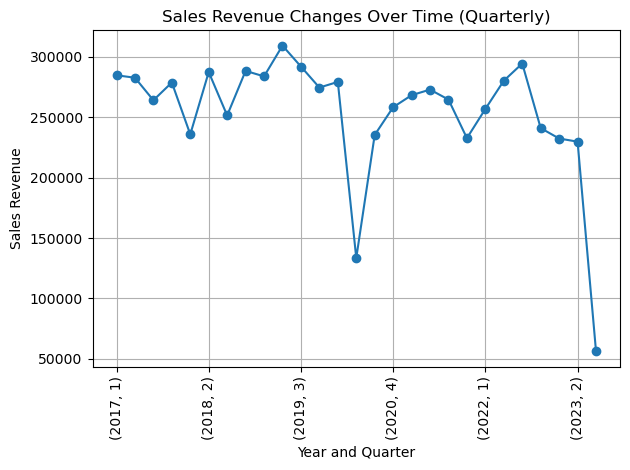

In [182]:
master_table_related.groupby(['Year', 'Quarter'])['Amount'].sum().plot(marker='o')
plt.title('Sales Revenue Changes Over Time (Quarterly)')
plt.xlabel('Year and Quarter')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Findings for the Above Graph:
### From the Above graph we can check the Sales Revenue, for Year and Quater, where Sales Revenue has the high after 2018 and before the start of 2019 and after 2022 before 2023. Sales Revenue is so low during the two perios, after 2019 and before 2020 which is in the middle and completely down at the end of 2023. It started at High and ended at low.

### b) Accumulated sales revenue per quarter for the entire time period.

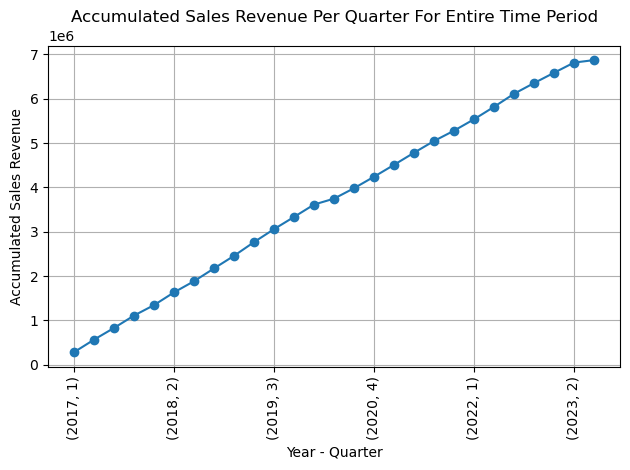

In [183]:
master_table_related.groupby(['Year', 'Quarter'])['Amount'].sum().cumsum().plot(marker='o')
plt.title('Accumulated Sales Revenue Per Quarter For Entire Time Period')
plt.xlabel('Year - Quarter')
plt.ylabel('Accumulated Sales Revenue')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Finding for the graph:
### Above graph is for the Accumalated Sales Revenue During the Year and Quater, Here the sales revenue Started at very low and by the end it was very high and it is progressive growth with no other fluctuations

### c)Sales revenue changes quarterly per category. The graph displays the sales revenue for both categories over time.

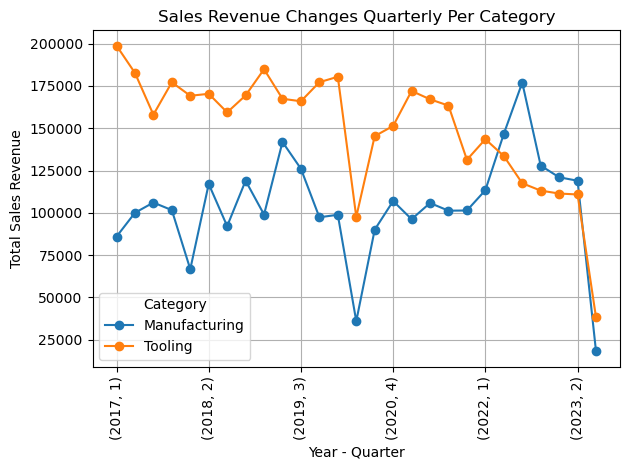

In [186]:
category_sales = master_table_related.groupby(['Year', 'Quarter', 'Category'])['Amount'].sum().unstack()
category_sales.plot(marker='o')
plt.title('Sales Revenue Changes Quarterly Per Category')
plt.xlabel('Year - Quarter')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Category')
plt.show()

### Finding for the graph:
    
### The Graph is for the Total sales revenue for both categories i.e, Manufacturing and Tooling, where the Tooling starts at high Sales Revenue and Ended at Very low by the end of 2023 2nd Quarter where as the Manufacturing Category Sales Revenue starts in the Middle and has lot of fluctations and it is also down by the end of 2023 2nd quarter but it high point before downfall

### d)Accumulated monthly revenue compared to the mean sales revenues over the time. This graph provides insights into busy vs. slow months. 


C:\Users\rahul\AppData\Local\Temp\ipykernel_11176\1842026051.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  monthly_sales.mean(level='Month').plot(label='Mean Revenue', linestyle='--')


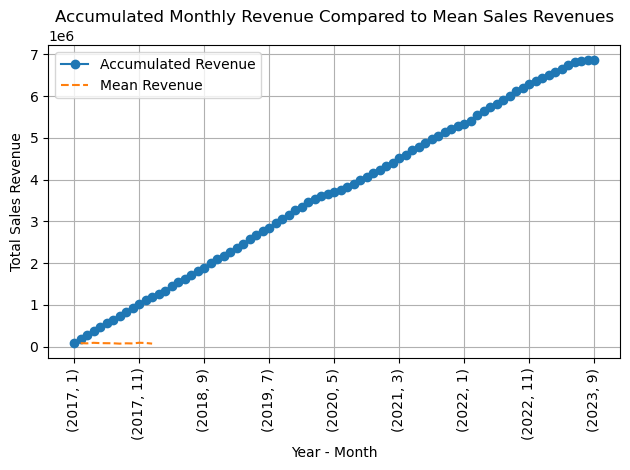

In [188]:
monthly_sales = master_table_related.groupby(['Year', 'Month'])['Amount'].sum()
monthly_sales.cumsum().plot(label='Accumulated Revenue', marker='o')
monthly_sales.mean(level='Month').plot(label='Mean Revenue', linestyle='--')
plt.title('Accumulated Monthly Revenue Compared to Mean Sales Revenues')
plt.xlabel('Year - Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

### Finding for the Graph:
### Above Graph has 2plots , one represent the Accumulated Monthly Revenue and other represents Mean Sales Revenue, Where Accumulated Monthly Revenue is is started at low and ended high with progressive growth and it has lot of data points in between as it is a comparision for year and months. Mean revenue started with at very low pace and it didn't extend further as there is issue and after 2017 there is no mean revenue

### e) The top five cities with the highest total sales revenues. 

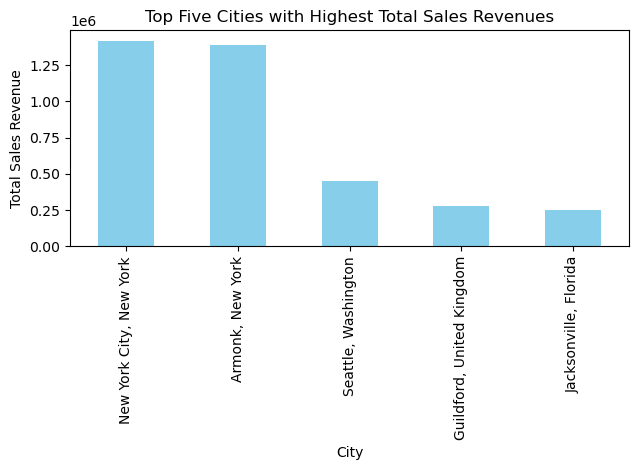

In [191]:
top_cities_total_sales = master_table_related.groupby('Billing Address')['Amount'].sum().nlargest(5)
top_cities_total_sales.plot(kind='bar', color='skyblue')
plt.title('Top Five Cities with Highest Total Sales Revenues')
plt.xlabel('City')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Finding for the Above graph:
### Above is Bar Graph comparision for the Top Five cities and their Total Sales Revenue, where New York City and Armonk has highest sales Revenues which shows that the sales revenue from New York State is High. Among these Five cities Jacksonville, Florida has the least Sales revenue. Compared to the cities of new york other cities are having a major low sales revenue which are less than 0.5

### f) The top five cities with the highest revenue in the Tooling category.


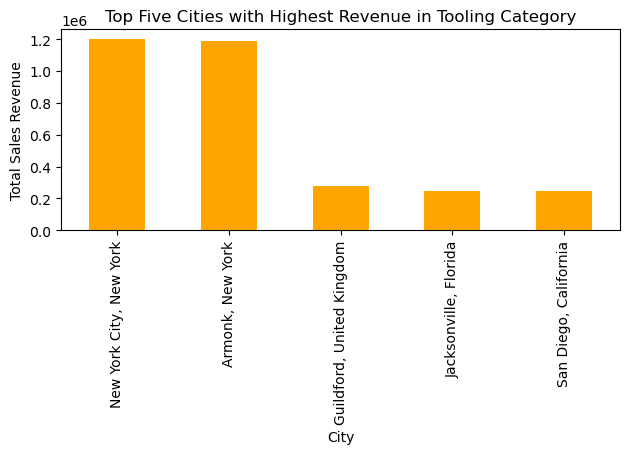

In [192]:
tooling_category_sales = master_table_related[master_table_related['Category'] == 'Tooling']
top_cities_tooling_sales = tooling_category_sales.groupby('Billing Address')['Amount'].sum().nlargest(5)
top_cities_tooling_sales.plot(kind='bar', color='orange')
plt.title('Top Five Cities with Highest Revenue in Tooling Category')
plt.xlabel('City')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Finding for the Above graph:    
### Above is Bar Graph comparision for the Top Five cities with Highest Revenue for the Tooling Category, Where the Again the sales revenue of the New york city and Armonk of New York State are very High which is close to 1.2 . Where Other cities like Guildford, Jacksonville and San Deigo are having considerabilly low Sales Revenue compared to former two cities, which are having sales revenueLess than 0.4 and more than 0.2 for the tooling catergory. This suggest that Tooling Category has the high Revenue in the New York State